In [1]:
# libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# style
from ipynb.fs.full.i_Style_Sheet import *
plt.style.use(style_use)
plt.rcParams.update(style_params)

# ColorSpace
from ipynb.fs.full.ii_ColorSpace import *
h = '89F4EC'
palettes = colorspace(h)
p = palettes['Switch Palette']

# data
f = r'Data\gss_general_social_survey.hdf5'
gss = pd.read_hdf(f)
gss.head()

,year,age,cohort,sex,race,educ,realinc,gunlaw,grass,wtssall
0,1972,26.0,1946.0,1,1,18.0,13537.0,2.0,NaN,0.8893
1,1972,38.0,1934.0,2,1,12.0,18951.0,1.0,NaN,0.4446
2,1972,57.0,1915.0,1,1,12.0,30458.0,1.0,NaN,1.3339
3,1972,61.0,1911.0,2,1,14.0,37226.0,1.0,NaN,0.8893
4,1972,59.0,1913.0,1,1,12.0,30458.0,2.0,NaN,0.8893


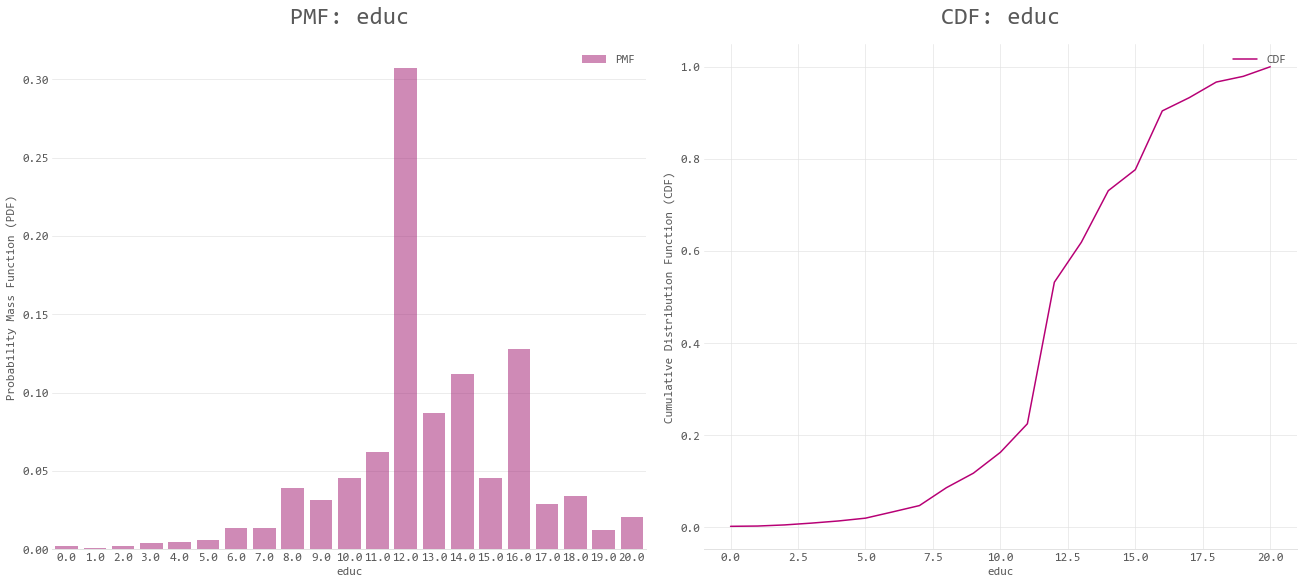

In [56]:
######################## PMF ########################

# probability mass function
def pmf(data, col, norm):
    
    from empiricaldist import Pmf
    pmf = Pmf.from_seq(data[col], normalize=norm)
    
    pmf = pd.DataFrame(pmf)
    pmf.reset_index(inplace=True)
    pmf.columns = [col, 'probs']
    
    return pmf

# pmf bar
def pmf_bar(ax, data, x, y, c, legloc):
    sns.barplot(ax=ax, data=data, x=x, y=y, color=c, label='PMF', alpha=0.5)
    ax.set_title(f'PMF: {x}')
    ax.set_xlabel(x)
    ax.set_ylabel('Probability Mass Function (PDF)')
    ax.legend(loc=legloc)
    return ax


######################## CDF ########################

# cumulative distribution function
def cdf(data, col, norm):
    
    from empiricaldist import Cdf
    cdf = Cdf.from_seq(data[col], normalize=norm)
    
    cdf = pd.DataFrame(cdf)
    cdf.reset_index(inplace=True)
    cdf.columns = [col, 'probs']
    
    return cdf

# cdf line
def cdf_line(ax, data, x, y, c, legloc):
    sns.lineplot(ax=ax, data=data, x=x, y=y, color=c, label='CDF')
    ax.set_title(f'CDF: {x}')
    ax.set_xlabel(x)
    ax.set_ylabel('Cumulative Distribution Function (CDF)')
    ax.legend(loc=legloc)
    return ax


######################## Application ########################

# variables
data = gss
col = 'educ'
norm = True

# distributions
pmf_df = pmf(data, col, norm)
cdf_df = cdf(data, col, norm)

# viz
fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(18,8), constrained_layout=True)
pmf_bar(ax1, pmf_df, col, 'probs', p[2], 1)
cdf_line(ax2, cdf_df, col, 'probs', p[2], 1)
plt.show()

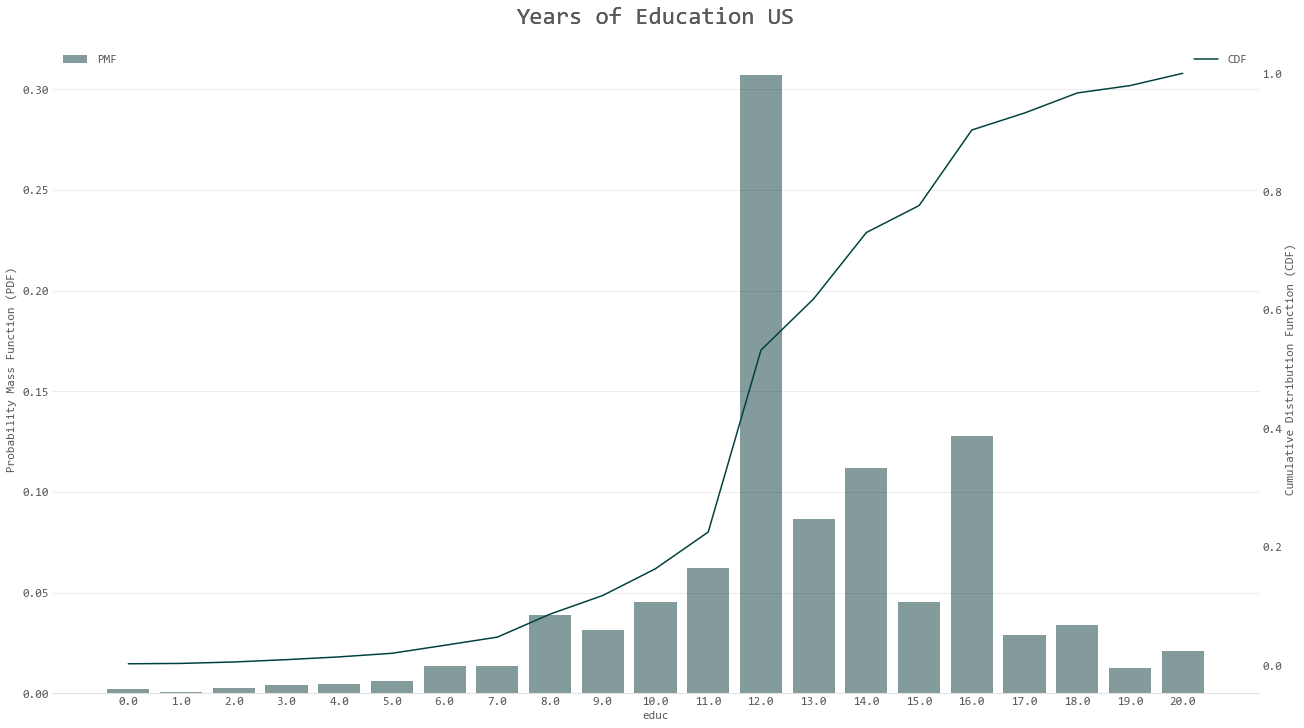

In [64]:
# twinx
fig, ax1 = plt.subplots(1, 1, figsize=(18,10), constrained_layout=True)
ax2 = ax1.twinx()

# functions
pmf_bar(ax1, pmf_df, col, 'probs', p[1], 2)
cdf_line(ax2, cdf_df, col, 'probs', p[1], 1)

# lose secondary grids
ax2.grid(False)

# format ttl
ttl = 'Years of Education US'
ax1.set_title(ttl)
ax2.set_title(ttl)

# show
#fig.savefig('pmf_cdf.png')
plt.show()